In [82]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import fitsio
import astropy.table as astTable

In [16]:
nside = 1024
npix = hp.nside2npix(nside)
field_list = ["spring1", "spring2", "spring3", "autumn1", "autumn2", "hectomap"]
num = np.zeros(npix, dtype="i4")
mask = np.zeros(npix, dtype="i4")
response = np.zeros(npix, dtype="f8")
variance = np.zeros(npix, dtype="f4")
fwhm = np.zeros(npix, dtype="f4")

for field in field_list:
    fname = f"/gpfs02/work/xiangchong.li/work/hsc_data/s23b/deepCoadd_anacal3/tests/gal_maps_{field}.fits"
    dd = fitsio.read(fname)
    num = num + dd["num"]
    mask = mask | dd["mask"]
    response = response + dd["response"]
    variance = variance + dd["variance"]
    fwhm = fwhm + dd["fwhm"]
    print(np.sum(np.isnan(dd["fwhm"])))

0
0
0
0
0
0


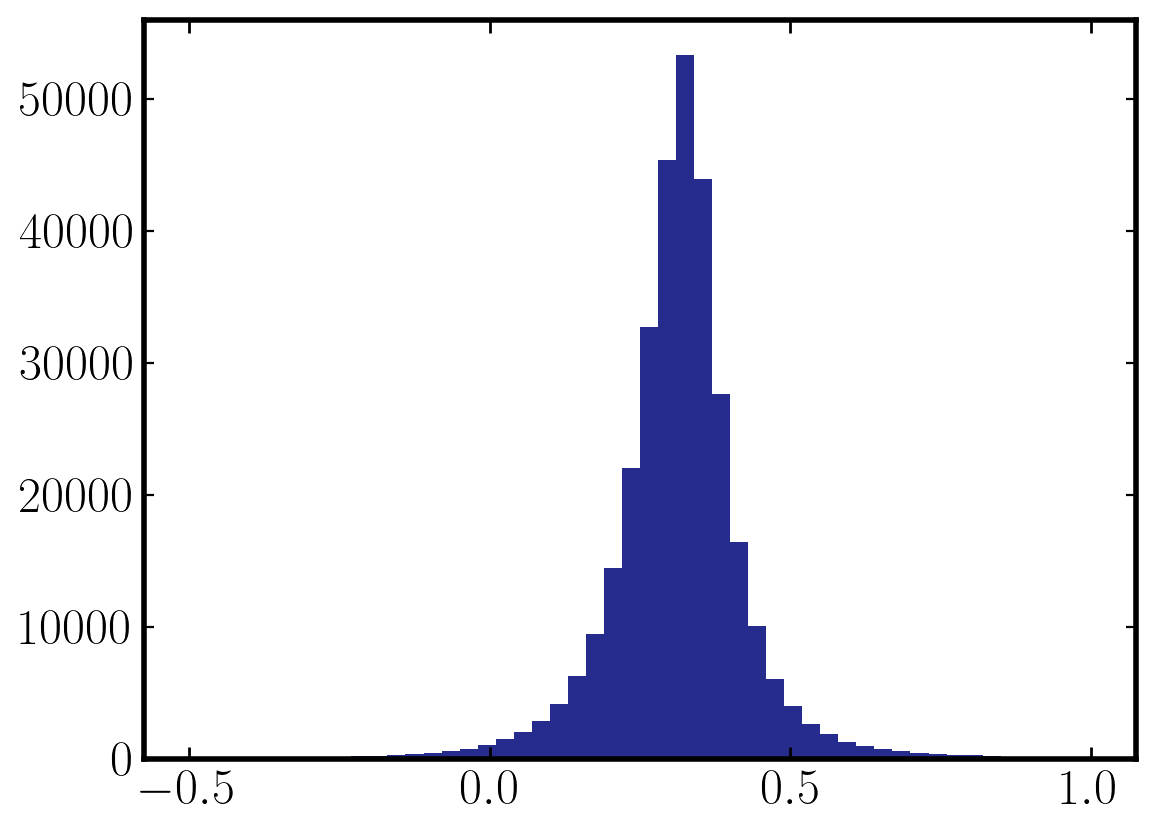

In [17]:
_=plt.hist(response[mask>0] / num[mask>0], bins=50, range=(-0.5, 1.0))

In [66]:
np.average(rrr[mask])

0.3171547937241051

In [20]:
np.nanmean(fwhm[(mask>0)] / num[(mask>0)])

0.6131672101581696

(array([ 3102., 14222., 42013., 61523., 81879., 72679., 34519.,  8156.,
         1565.,   128.]),
 array([0.41687563, 0.46134676, 0.5058179 , 0.55028903, 0.59476016,
        0.63923129, 0.68370242, 0.72817355, 0.77264468, 0.81711581,
        0.86158694]),
 <BarContainer object of 10 artists>)

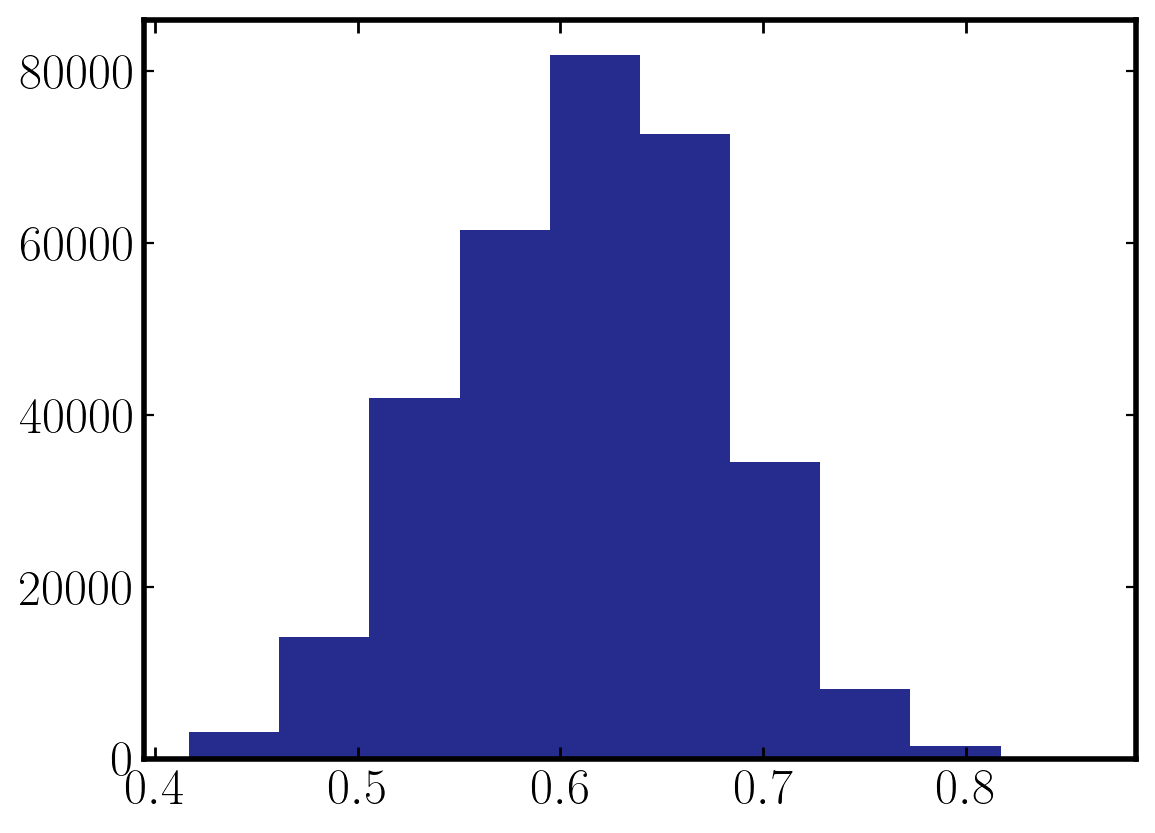

In [21]:
plt.hist(fwhm[(mask>0)] / num[(mask>0)])

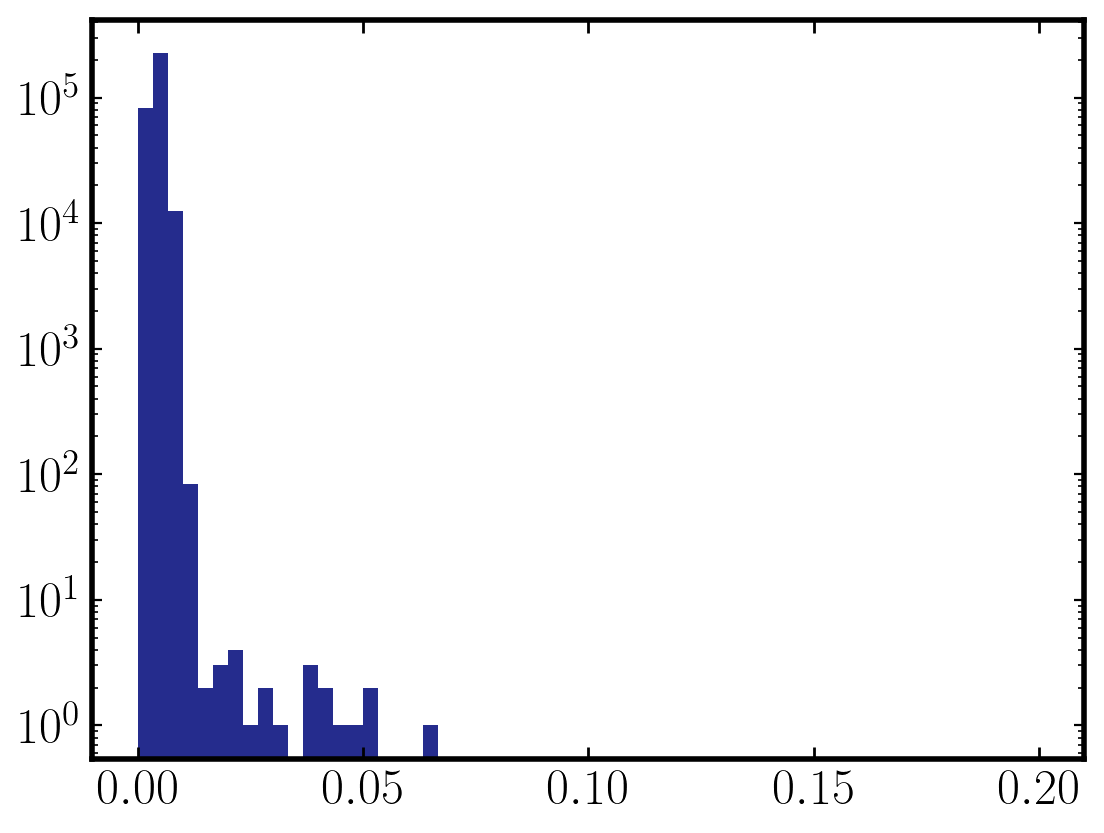

In [32]:
plt.hist(variance[(mask>0)] / num[(mask>0)], bins=60, range=(0.0, 0.2))
plt.yscale("log")

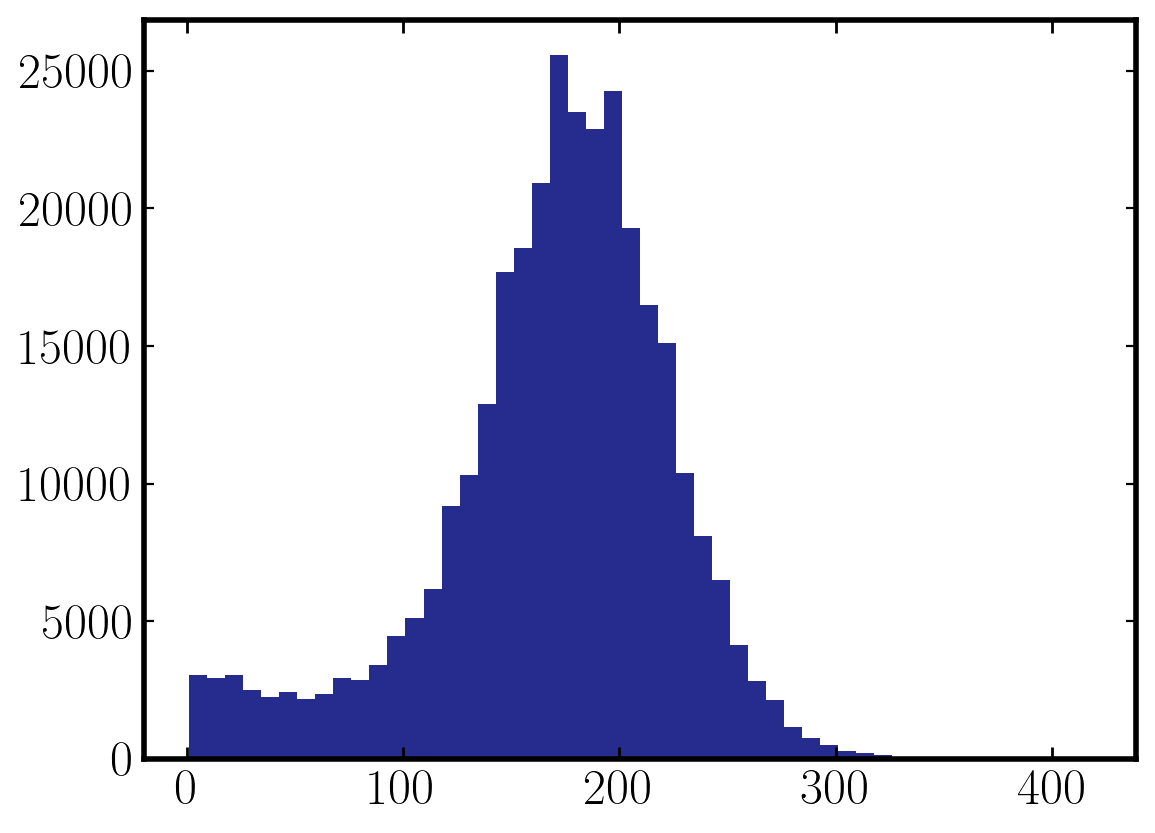

In [23]:
_ = plt.hist(num[(mask>0)], bins = 50)

/tmp/ipykernel_28712/2197137034.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(variance[(mask>0)] / num[(mask>0)]), response[(mask>0)] / num[(mask>0)])


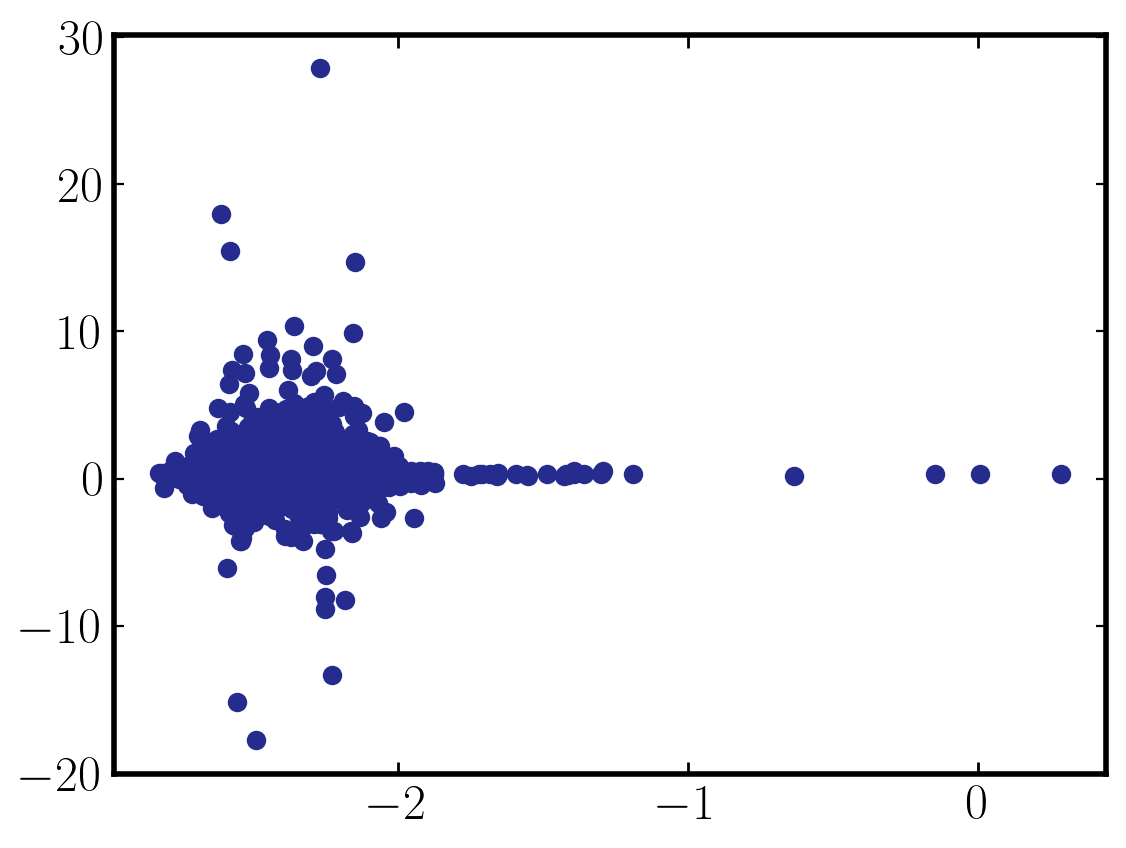

In [28]:
plt.scatter(np.log10(variance[(mask>0)] / num[(mask>0)]), response[(mask>0)] / num[(mask>0)])

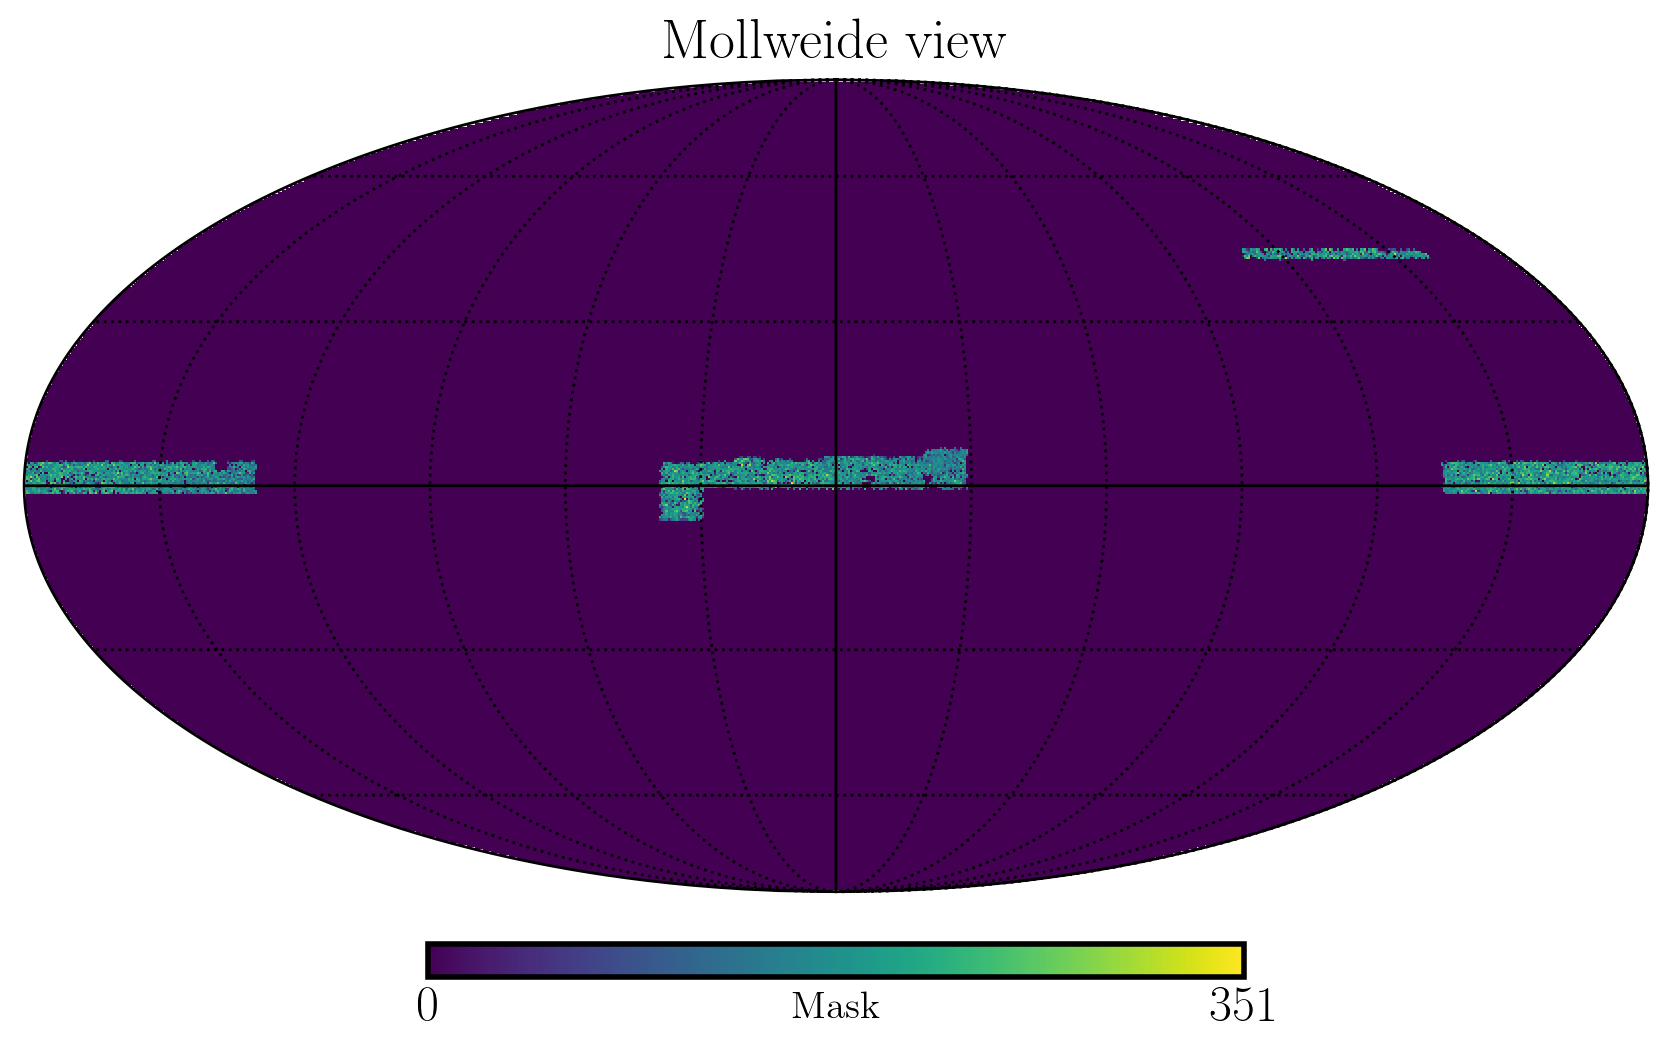

In [61]:
hp.mollview(num, nest=True, cmap="viridis", unit="Mask")
hp.graticule()
plt.show()

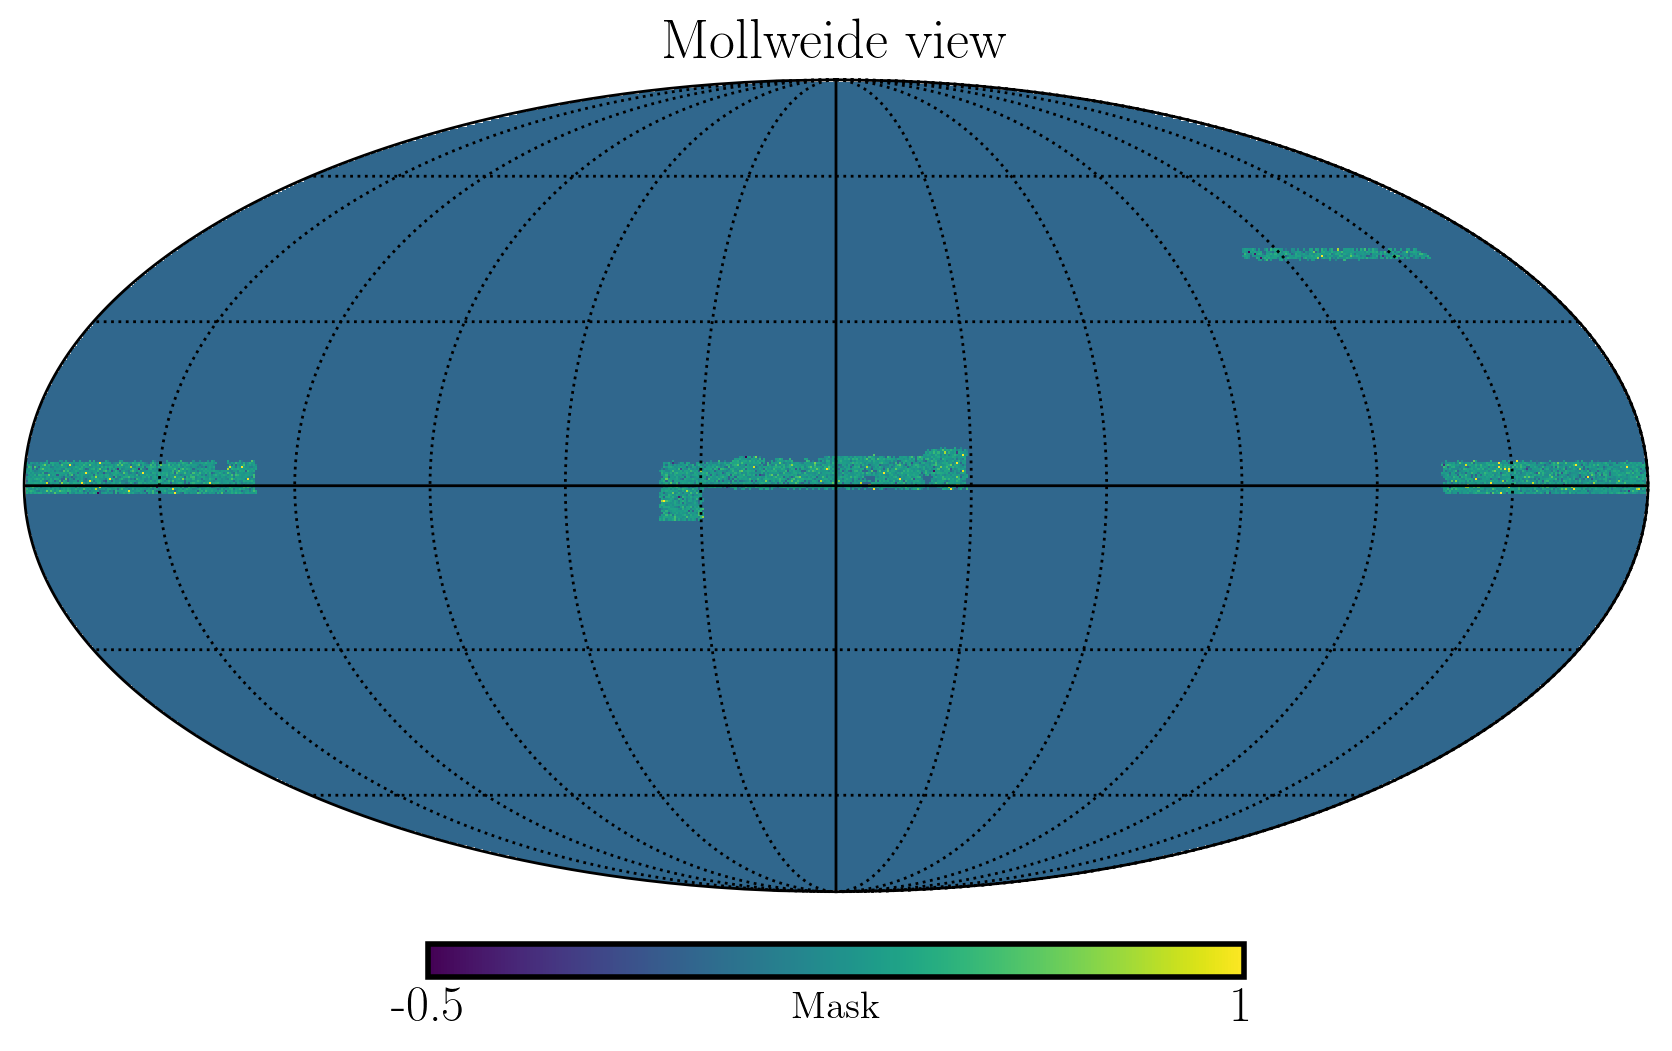

In [62]:
rrr = response / (num + 1e-13)
hp.mollview(rrr, nest=True, cmap="viridis", unit="Mask", min=-0.5, max=1.0)
hp.graticule()
plt.show()

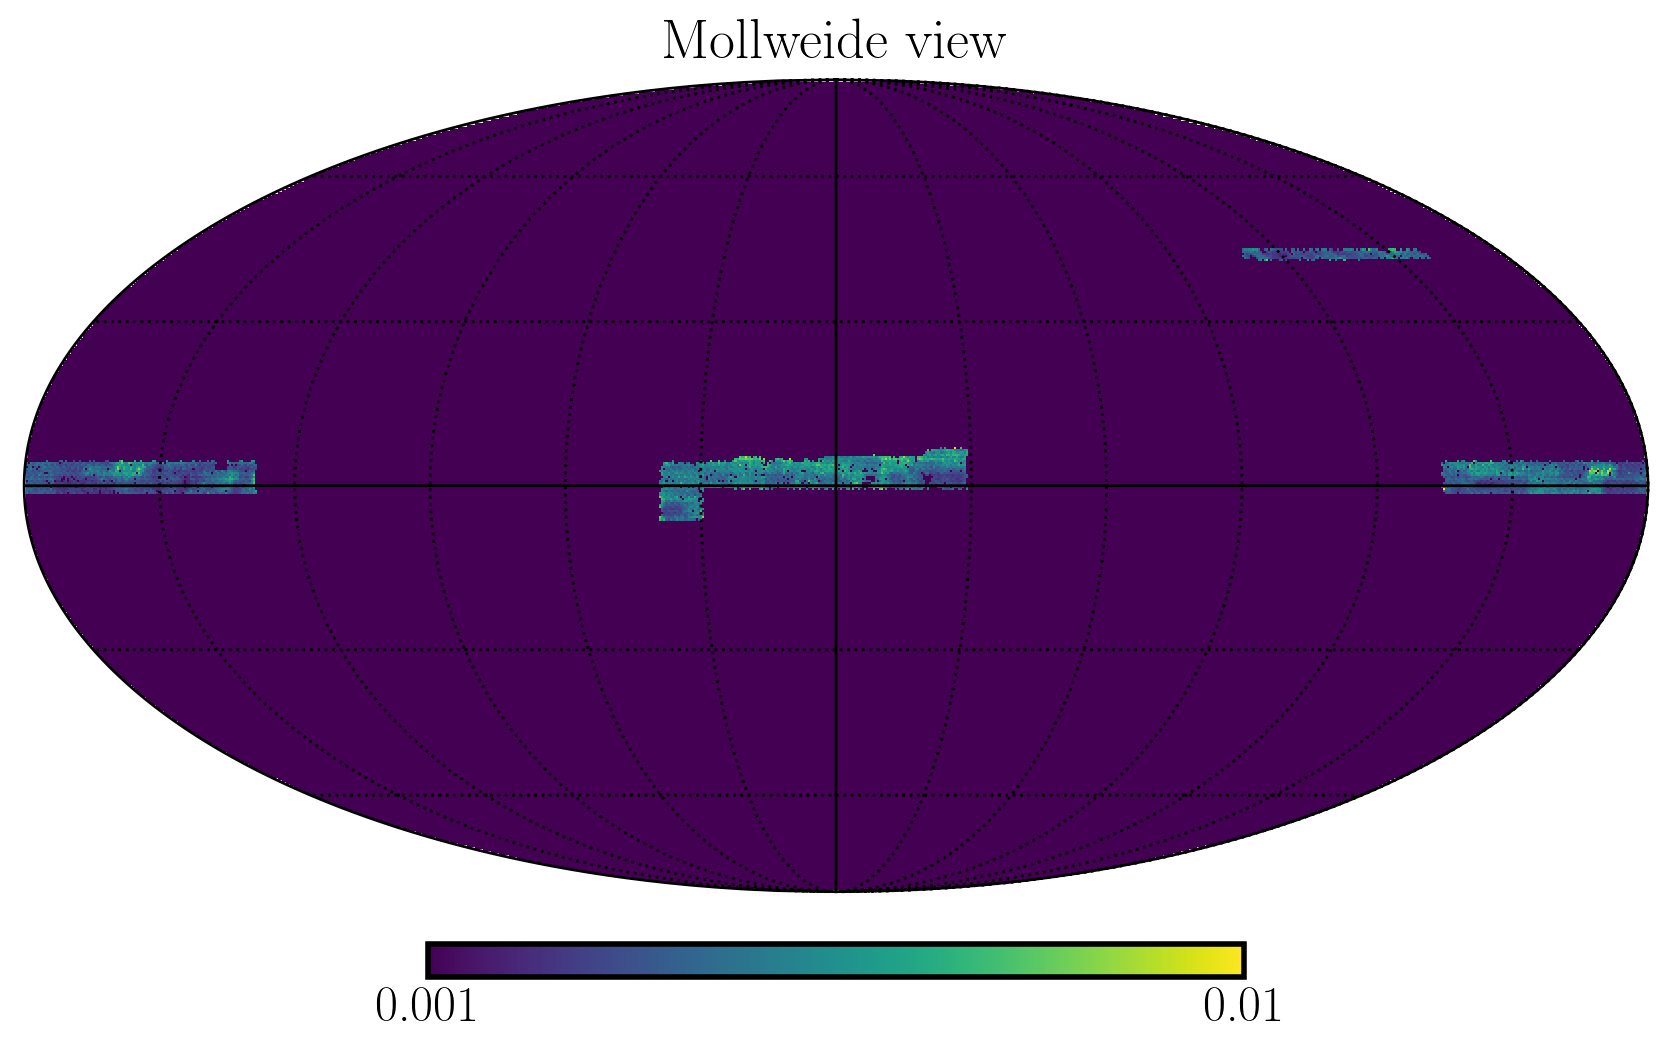

In [63]:
vvv = variance / (num + 1e-13)
hp.mollview(vvv, nest=True, cmap="viridis", min=1e-3, max=0.01)
hp.graticule()
plt.show()

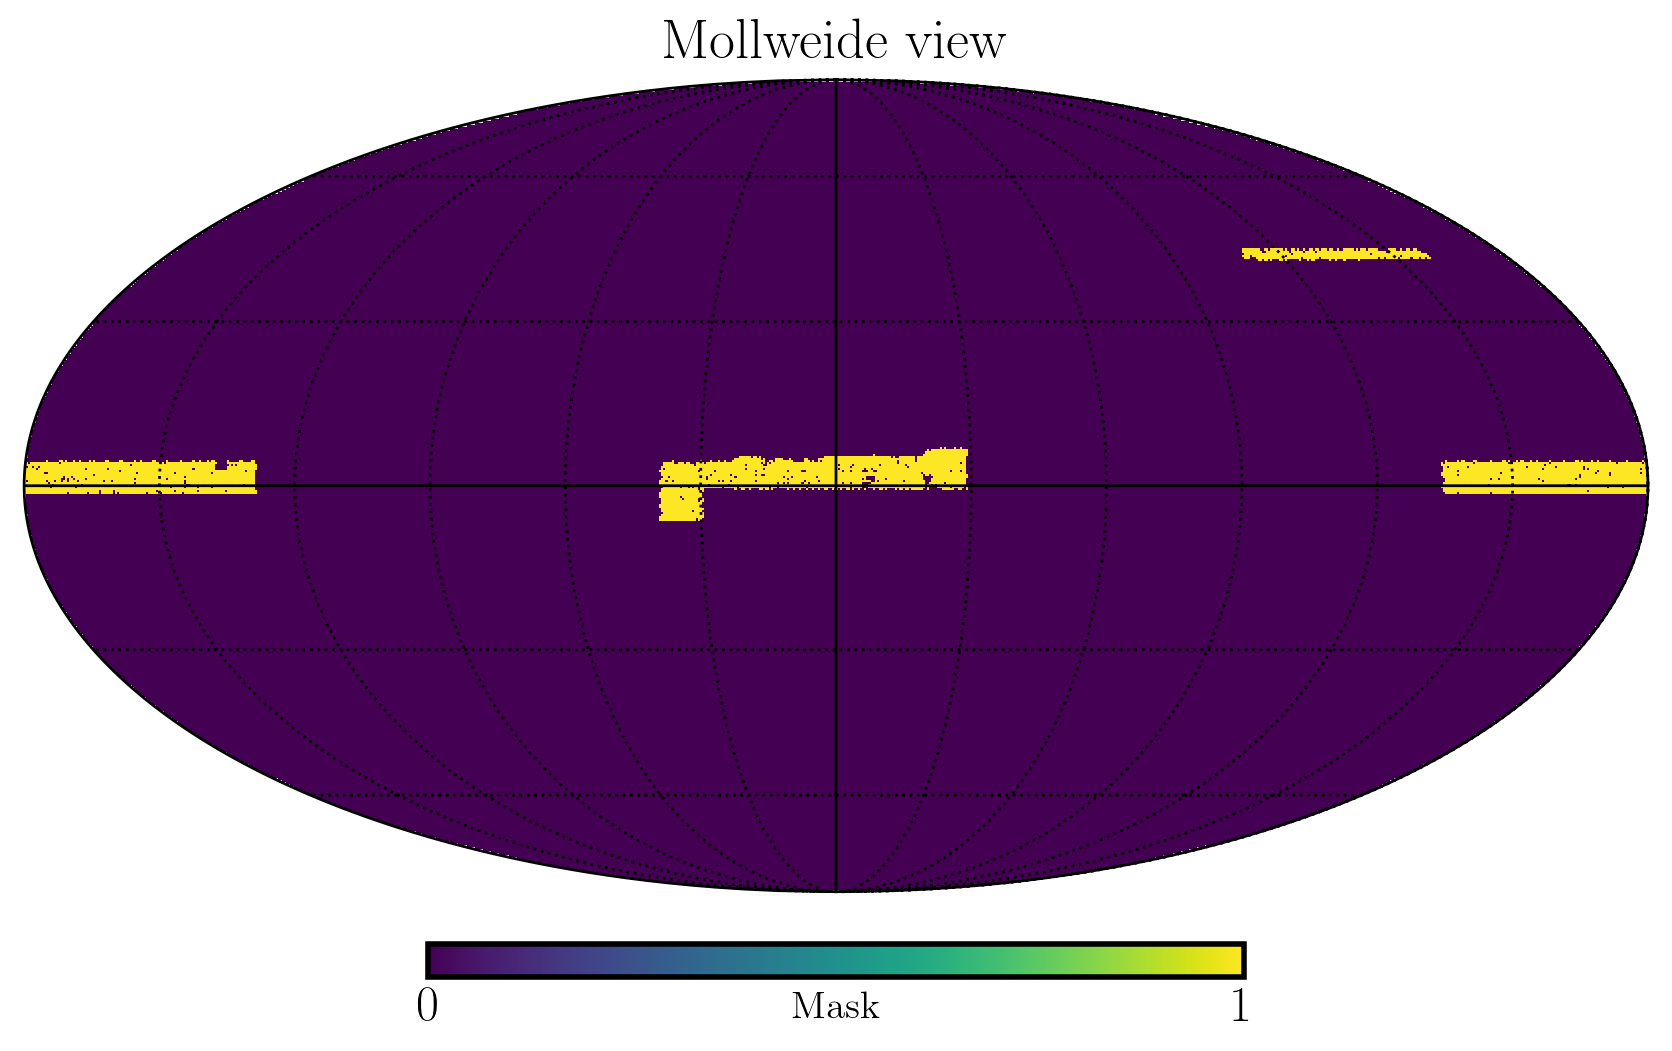

In [65]:
hp.mollview(mask.astype(float), nest=True, cmap="viridis", unit="Mask")
hp.graticule()
plt.show()

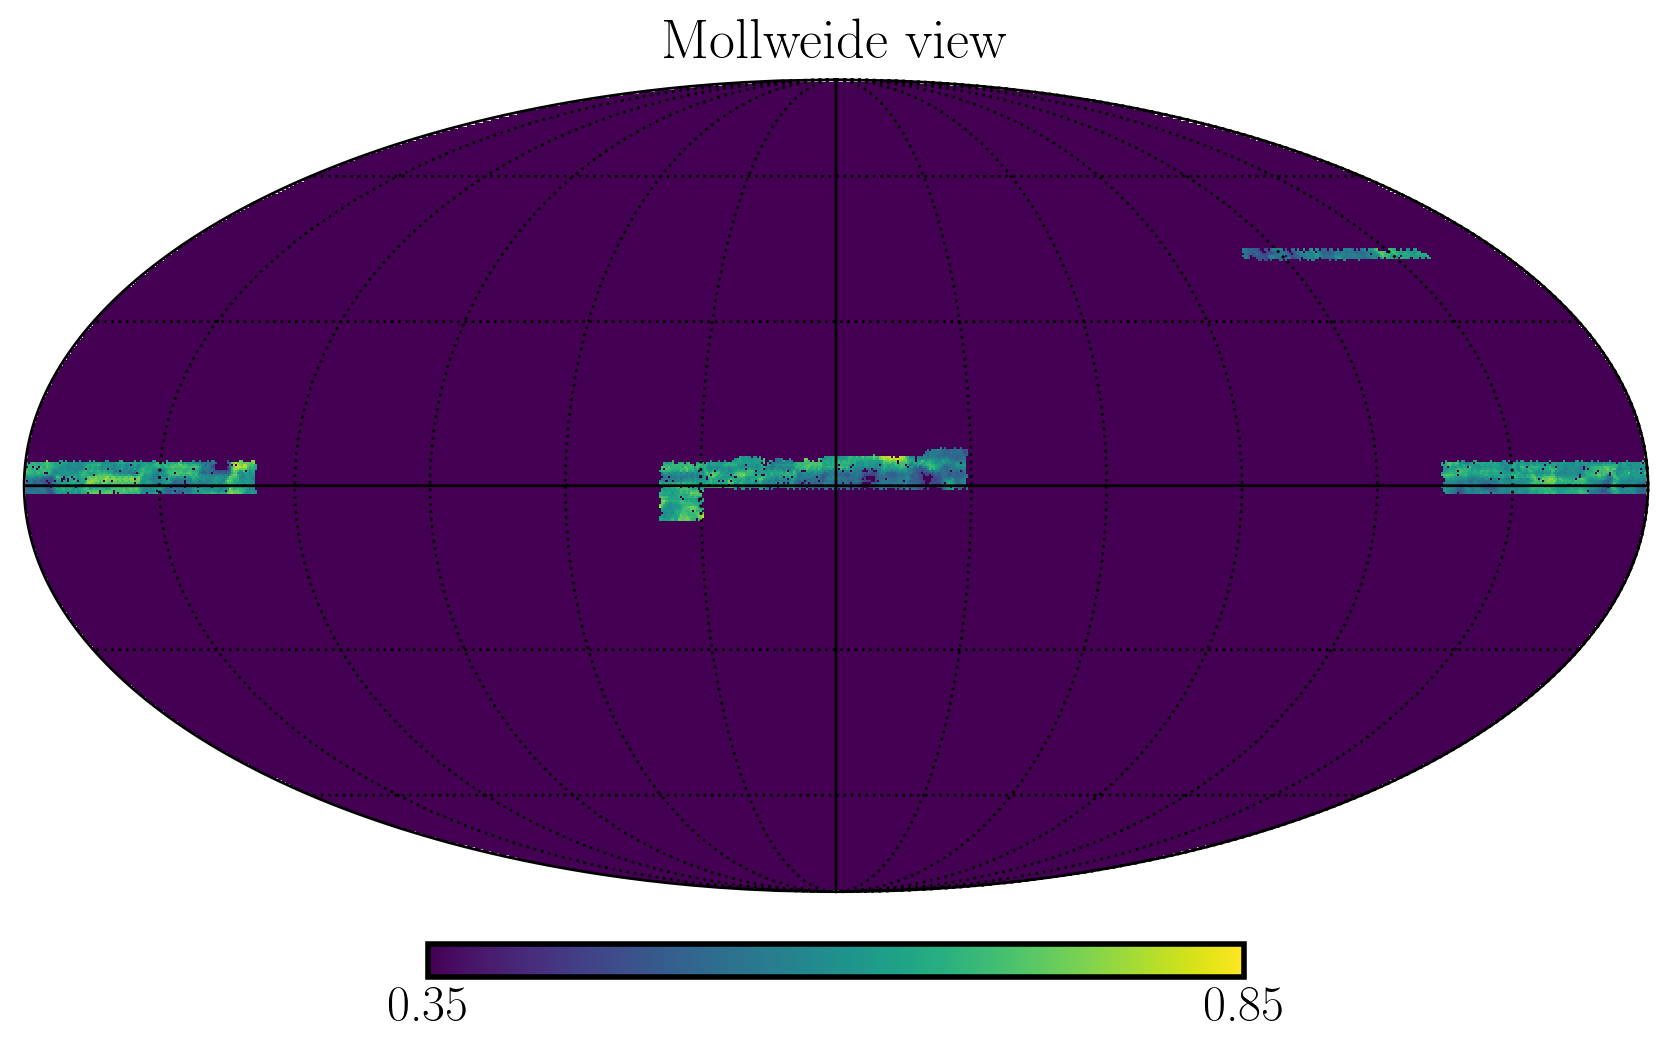

In [121]:
hp.mollview(fwhm / (num + 1e-13) , nest=True, cmap="viridis", min=0.35, max=0.85)
hp.graticule()
plt.show()